<a href="https://colab.research.google.com/github/ardalanebrahimi/EDU/blob/master/Deep%20Learninn-Ex01-IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

(train_data,train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
train_labels[0]

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review  = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#output = relu(dot(input, W) + b)
#model.compile(optimizer='rmsprop'
#              ,loss='binary_crossentropy',
#              metrics=['accuracy'])    

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001)
              ,loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])    

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [77]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.5048 - binary_accuracy: 0.7871 - val_loss: 0.3775 - val_binary_accuracy: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2991 - binary_accuracy: 0.9046 - val_loss: 0.3001 - val_binary_accuracy: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.2173 - binary_accuracy: 0.9285 - val_loss: 0.3081 - val_binary_accuracy: 0.8716
Epoch 4/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1747 - binary_accuracy: 0.9437 - val_loss: 0.2825 - val_binary_accuracy: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.1422 - binary_accuracy: 0.9540 - val_loss: 0.2856 - val_binary_accuracy: 0.8855
Epoch 6/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1148 - binary_accuracy: 0.9652 - val_loss: 0.3152 - val_bi

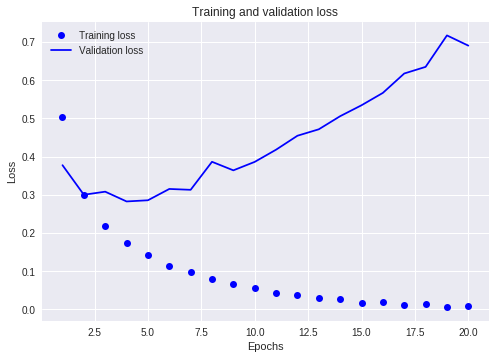

In [78]:
import matplotlib.pyplot as plt
history_dict = history.history
#history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

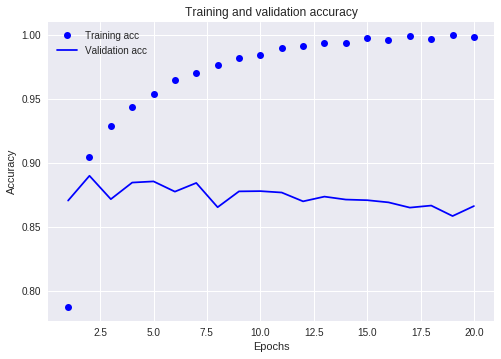

In [79]:
history_dict.keys()
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [80]:

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop'
              ,loss='binary_crossentropy',
              metrics=['accuracy'])    

model.fit(x_train,y_train,epochs=4,batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 122us/step - loss: 0.4739 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.2634 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.1985 - acc: 0.9306
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


In [85]:
results

[0.3225671417427063, 0.87304]

In [87]:
model.predict(x_test)

array([[0.13631363],
       [0.9997111 ],
       [0.28520334],
       ...,
       [0.07501093],
       [0.04523316],
       [0.4920561 ]], dtype=float32)